In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.stats import shapiro
import os

In [2]:
#read the data
data_path1 = os.path.join(os.getcwd(), "d4frac_returns.csv")
data_path2 = os.path.join(os.getcwd(), "d5frac_returns.csv")
data_path3 = os.path.join(os.getcwd(), "weights4.csv")
data_path4 = os.path.join(os.getcwd(), "weights5.csv")

In [3]:
d4frac = pd.read_csv(data_path1, header = None)
d5frac = pd.read_csv(data_path2, header = None)
weights_4 = pd.read_csv(data_path3, header = None)
weights_5 = pd.read_csv(data_path4, header = None)

In [4]:
weights_4 = weights_4[0].values.tolist()
weights_5 = weights_5[0].values.tolist()

## Data Exploration

### Number of Transactions

In [5]:
print(len(d4frac))
print(len(d5frac))

30029
14315


### Distribution of Returns

In [6]:
#Filtering positive and negative returns

positive_ret_4 = list(filter(lambda x: x >= 0, d4frac[0]))
negative_ret_4 = list(filter(lambda x: x < 0, d4frac[0]))
positive_ret_5 = list(filter(lambda x: x >= 0, d5frac[0]))
negative_ret_5 = list(filter(lambda x: x < 0, d5frac[0]))

#Distribution

print(f"Number of positive returns (Day 4): {len(positive_ret_4)}")
print(f"Number of negative returns (Day 4): {len(negative_ret_4)}")
print(f"Number of positive returns (Day 5): {len(positive_ret_5)}")
print(f"Number of negative returns (Day 5): {len(negative_ret_5)}")

Number of positive returns (Day 4): 16468
Number of negative returns (Day 4): 13561
Number of positive returns (Day 5): 7241
Number of negative returns (Day 5): 7074


### Average Return

In [7]:
print("Day 4 Stats:")
print(f"mean: {float(d4frac.mean())}")
print(f"std: {float(d4frac.std())}")
print("")

print("Day 5 Stats:")
print(f"mean: {float(d5frac.mean())}")
print(f"std: {float(d5frac.std())}")

Day 4 Stats:
mean: 0.0014217090146192012
std: 0.019940819777262635

Day 5 Stats:
mean: 5.295144952846694e-06
std: 0.018108583112847385


### Average Gain and Average Loss

In [8]:
def Average(lst): 
    return sum(lst) / len(lst) 

avg_gain_4 = Average(positive_ret_4)
avg_loss_4 = Average(negative_ret_4)
avg_gain_5 = Average(positive_ret_5)
avg_loss_5 = Average(negative_ret_5)

print(f"Average Gain (Day 4): {avg_gain_4}")
print(f"Average Loss (Day 4): {avg_loss_4}")
print(f"Average Gain (Day 5): {avg_gain_5}")
print(f"Average Loss (Day 5): {avg_loss_5}")

Average Gain (Day 4): 0.014301742773864414
Average Loss (Day 4): -0.014219349605486245
Average Gain (Day 5): 0.012760751277447899
Average Loss (Day 5): -0.013051286400904713


## Probability of Gain and Loss

In [9]:
prob_gain_4 = len(positive_ret_4)/len(d4frac)
prob_loss_4 = len(negative_ret_4)/len(d4frac)

prob_gain_5 = len(positive_ret_5)/len(d5frac)
prob_loss_5 = len(negative_ret_5)/len(d5frac)

print(f"Probability of Gain (a stock being traded on day 4): {prob_gain_4}")
print(f"Probability of Gain (a stock being traded on day 5): {prob_gain_5}")
print(f"Probability of Loss (a stock being traded on day 4): {prob_loss_4}")
print(f"Probability of Loss (a stock being traded on day 5): {prob_loss_5}")

Probability of Gain (a stock being traded on day 4): 0.5484032102301108
Probability of Gain (a stock being traded on day 5): 0.5058330422633601
Probability of Loss (a stock being traded on day 4): 0.4515967897698891
Probability of Loss (a stock being traded on day 5): 0.4941669577366399


## Visualization

### (A) Average 

Considering all stocks that can be traded on days 4 and 5, respectively

### Histograms

In [10]:
max_d4 = float(d4frac.max())
min_d4 = float(d4frac.min())
max_d5 = float(d5frac.max())
min_d5 = float(d5frac.min())
n = d4frac.count()
n2 = d5frac.count() 

bins_d4 = (max_d4 - min_d4)/math.sqrt(n)

bins_d5 = (max_d5 - min_d5)/math.sqrt(n2)

In [11]:
bin_num_d4 = np.arange(min_d4, max_d4  + bins_d4, bins_d4)

bin_num_d5 = np.arange(min_d5, max_d5  + bins_d5, bins_d5)

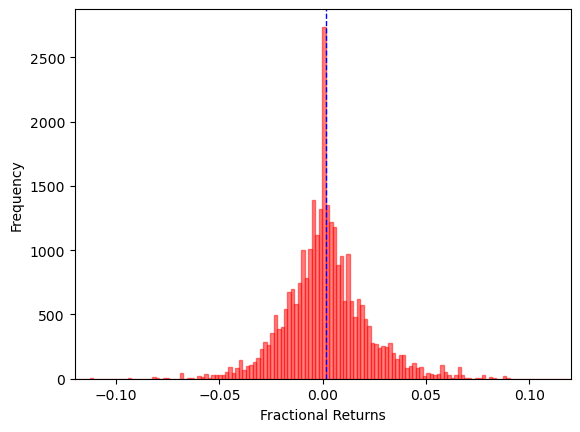

Day 4 Stats:
mean: 0.0014217090146192012
std: 0.019940819777262635


In [12]:
# Creating the histogram using d4frac data
bin_num_d4 = np.arange(min_d4, max_d4  + bins_d4, bins_d4)
plt.hist(d4frac, bins=bin_num_d4, density=False, alpha=0.5, color='r', edgecolor='red')

# Adding labels and title
plt.xlabel('Fractional Returns')
plt.ylabel('Frequency')

# Calculate the mean
avg_d4 = d4frac.mean()

# Highlight the mean
plt.axvline(avg_d4.item(), color='blue', linestyle='dashed', linewidth=1)

# Setting the x-axis limits
plt.xlim(-0.12, 0.12)

plt.show()

#density: bool, default: False
#If True, draw and return a probability density: each bin will display the bin's raw count divided 
#by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), 
#so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).

print("Day 4 Stats:")
print(f"mean: {float(d4frac.mean())}")
print(f"std: {float(d4frac.std())}")

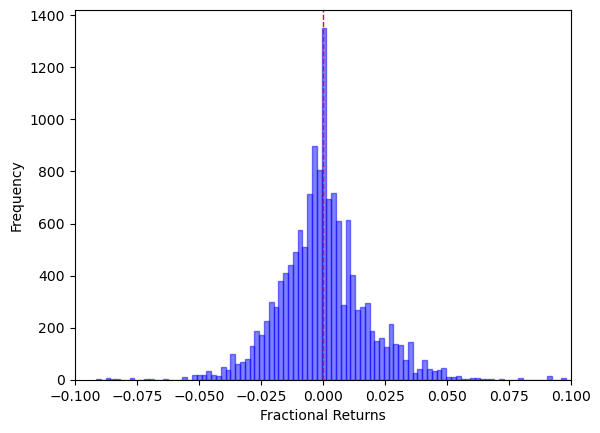

Day 5 Stats:
mean: 5.295144952846694e-06
std: 0.018108583112847385


In [13]:
# Creating the histogram using d5frac1 data
bin_num_d5 = np.arange(min_d5, max_d5  + bins_d5, bins_d5)
plt.hist(d5frac, bins=bin_num_d5, density=False, alpha=0.5, color='b', edgecolor='blue')

# Adding labels and title
plt.xlabel('Fractional Returns')
plt.ylabel('Frequency')

# Calculate the mean
avg_d5 = d5frac.mean()

# Highlight the mean
plt.axvline(avg_d5.item(), color='red', linestyle='dashed', linewidth=1)


# Setting the x-axis limits
plt.xlim(-0.1, 0.1)

plt.show()

print("Day 5 Stats:")
print(f"mean: {float(d5frac.mean())}")
print(f"std: {float(d5frac.std())}")

## (B) Average of the Averages

Getting the average of the average fractional returns of stock i traded on day j, i = 1:10 and j = 4,5

##### Mean Fractional Returns per Meaningful Word

##### Helper Functions

In [14]:
# Function that outputs normalized histogram of Day-4 and Day-5 returns of individual sequences
def histogram_norm(csv_path1, csv_path2):
    data_path1 = os.path.join(os.getcwd(), csv_path1)
    data_path2 = os.path.join(os.getcwd(), csv_path2)
    df1 = pd.read_csv(data_path1, header = None)
    df2 = pd.read_csv(data_path2, header = None)
    
    df1_max = float(df1.max())
    df1_min = float(df1.min())
    df2_max = float(df2.max())
    df2_min = float(df2.min())
    
    n1 = df1.count()
    n2 = df2.count() 
    
    df1_bins = (df1_max - df1_min)/math.sqrt(n1)
    df2_bins = (df2_max - df2_min)/math.sqrt(n2)
    
    df1_binwidth = round(df1_bins,2)
    df2_binwidth = round(df2_bins,2)
    
    df1_xbins = np.arange(df1_min, df1_max + df1_binwidth, df1_binwidth)
    df2_xbins = np.arange(df2_min, df2_max + df2_binwidth, df2_binwidth)
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (10, 10), tight_layout=True)
    axes[0].hist(df1, bins=df1_xbins, density=True, alpha=0.5, color='r', edgecolor='red')
    axes[0].set_xlabel('Fractional Returns')
    axes[0].set_ylabel('Probability Density')
    axes[0].set_title('Normalized Histogram of Day-4 Returns')
    
    axes[1].hist(df2, bins=df2_xbins, density=True, alpha=0.5, color='forestgreen', edgecolor='darkgreen')
    axes[1].set_xlabel('Fractional Returns')
    axes[1].set_ylabel('Probability Density')
    axes[1].set_title('Normalized Histogram of Day-5 Returns')
    
    data = {
    "Fractional Return": ["Day 4", "Day 5"],
    "Average Return": [float(df1.mean()),float(df2.mean())],
    "Standard Deviation": [float(df1.std()),float(df2.std())]
    }

    df = pd.DataFrame(data)
    
    return df

In [29]:
# Function that outputs (frequency) histogram of weekly Day-4 and Day-5 returns of sequences
def histogram_weekly5(csv_path):
    data_path = os.path.join(os.getcwd(), csv_path)
    df1 = pd.read_csv(data_path, header = None)
    
    df1_max = float(df1.max())
    df1_min = float(df1.min())
    
    n1 = df1.count()
    
    df1_bins = (df1_max - df1_min)/math.sqrt(n1)
    
    df1_binwidth = df1_bins
    
    df1_xbins = np.arange(df1_min, df1_max + df1_binwidth, df1_binwidth)
    
    plt.xlim(-0.005,0.005)
    
    plt.xlabel('Mean Fractional Returns')
    plt.ylabel('Frequency')
    
    plt.hist(df1, bins=df1_xbins, density=False, alpha=0.5, color='b', edgecolor='blue')
    
    plt.savefig('G1 D5 Mean Freturns.jpg')
    
    data = {
    "Fractional Return": ["Day 4"],
    "Average Return": [float(df1.mean())],
    "Standard Deviation": [float(df1.std())]
    }

    df = pd.DataFrame(data)
    
    return df

In [16]:
# Create a list of the csv files. Use separately for day 4 and day 5.

"""
Note: Make separate folders for csv files of day-4 and day-5 fractional returns.
Make a copy of the csv files of fractional returns and paste them in their respective folders. 
Here, D4_FReturns is the name of the folder containing all csv files for day-4 fractional returns
"""

d4_csv_files = sorted([f for f in os.listdir(os.path.join(os.getcwd(), 'D4_FReturns')) if f.endswith('.csv')], key=lambda x: int(x[6:-4]))

d5_csv_files = sorted([f for f in os.listdir(os.path.join(os.getcwd(), 'D5_FReturns')) if f.endswith('.csv')], key=lambda x: int(x[6:-4]))


# print(csv_files) to check content of the list

In [17]:
d4_csv_files

['d4frac1.csv',
 'd4frac2.csv',
 'd4frac3.csv',
 'd4frac4.csv',
 'd4frac5.csv',
 'd4frac6.csv',
 'd4frac7.csv',
 'd4frac8.csv',
 'd4frac9.csv',
 'd4frac10.csv',
 'd4frac11.csv',
 'd4frac12.csv',
 'd4frac13.csv',
 'd4frac14.csv',
 'd4frac15.csv',
 'd4frac16.csv',
 'd4frac17.csv',
 'd4frac18.csv',
 'd4frac19.csv',
 'd4frac20.csv',
 'd4frac21.csv',
 'd4frac22.csv',
 'd4frac23.csv',
 'd4frac24.csv',
 'd4frac25.csv',
 'd4frac26.csv',
 'd4frac27.csv',
 'd4frac28.csv',
 'd4frac29.csv',
 'd4frac30.csv',
 'd4frac31.csv',
 'd4frac32.csv',
 'd4frac33.csv',
 'd4frac34.csv',
 'd4frac35.csv',
 'd4frac36.csv',
 'd4frac37.csv',
 'd4frac38.csv',
 'd4frac39.csv',
 'd4frac40.csv',
 'd4frac41.csv',
 'd4frac42.csv',
 'd4frac43.csv',
 'd4frac44.csv',
 'd4frac45.csv',
 'd4frac46.csv',
 'd4frac47.csv',
 'd4frac48.csv',
 'd4frac49.csv',
 'd4frac50.csv',
 'd4frac51.csv',
 'd4frac52.csv',
 'd4frac53.csv',
 'd4frac54.csv',
 'd4frac55.csv',
 'd4frac56.csv',
 'd4frac57.csv',
 'd4frac58.csv',
 'd4frac59.csv',
 'd4fr

In [18]:
# Function that outputs the mean fractional return where input is a csv file
def mean_freturns(csv_path):
    data_path = os.path.join(os.getcwd(), csv_path)
    df = pd.read_csv(data_path, header = None)
    mean_freturn = df.mean()
    return mean_freturn

In [19]:
# Compiles all the day-4 mean returns per meaningful word 

d4_mean_freturns = []

for csv in d4_csv_files: # d4_csv_files is the list of csv files of day-4 fractional returns
    mean_freturn = float(mean_freturns(csv).iloc[0])
    d4_mean_freturns.append(mean_freturn)

# print(d4_mean_freturns, len(d4_mean_freturns)) to check values

for mean_freturn in d4_mean_freturns:
    print(mean_freturn)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19924\523688013.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_freturn = df.mean()


0.0008848056537102474
0.0006460526315789471
0.0032833333333333325
0.0011768965517241381
0.002768965517241379
0.0011986394557823128
0.003456537102473498
0.002856551724137931
0.0023322807017543863
0.0007688356164383559
0.002881972789115646
0.002849629629629629
0.002024080267558529
0.0025310104529616723
0.0011850340136054423
-5.276752767527647e-05
0.0026760147601476015
-0.0006258620689655175
0.0020694244604316544
0.002724285714285714
0.0023322807017543863
-0.00013537414965986443
0.0008848056537102474
0.0020051020408163264
0.0007843205574912893
0.002976254180602007
0.0014619999999999998
0.0008089999999999999
0.0017870629370629366
0.0007077738515901061
-0.0014853658536585366
-0.00043573770491803264
0.0004468965517241378
0.0015292517006802722
0.0020051020408163264
0.001718727915194346
0.00015068965517241404
0.0025399999999999997
0.0025279151943462903
0.0014619999999999998
0.000824381625441696
0.0032300000000000002
0.002322299651567944
0.0005578947368421052
0.0023968965517241372
0.00055789473

In [20]:
# Compiles all the day-5 mean returns per meaningful word 

d5_mean_freturns = []

for csv in d5_csv_files: # d5_csv_files is the list of csv files of day-5 fractional returns
    mean_freturn = float(mean_freturns(csv).iloc[0])
    d5_mean_freturns.append(mean_freturn)

# print(d5_mean_freturns, len(d5_mean_freturns)) to check values

for mean_freturn in d5_mean_freturns:
    print(mean_freturn)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19924\523688013.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_freturn = df.mean()


-0.0017604477611940297
-0.0010563758389261746
-0.0006568627450980393
0.0019578231292517005
0.001536
0.001345
-0.0002879999999999999
0.0018965517241379313
-0.0007425531914893617
-0.0014187499999999999
-0.0005268456375838927
-0.0009893129770992366
-0.000436241610738255
0.0023957446808510643
-0.0010992424242424245
0.0006717741935483873
0.001565354330708662
0.0029635036496350364
0.0006356060606060607
0.0018563380281690137
-0.0017035460992907805
0.0004157894736842105
0.00028731343283582115
-0.0012920529801324506
0.00037313432835820907
-0.0003197278911564622
-0.0003836879432624116
-0.0008036764705882356
0.0019610294117647056
0.001896402877697842
0.002810833333333333
0.0004007874015748031
0.00016249999999999967
-0.0007884353741496599
-0.0005549668874172184
0.0004984848484848482
0.0009468749999999999
0.0012422077922077924
-0.0019074829931972788
-0.0025007092198581563
0.002089130434782609
-0.0010074074074074072
0.0001856115107913669
-0.0017266666666666671
0.0003524137931034483
-0.00091583333333

In [21]:
positives = [x for x in d5_mean_freturns if x > 0]
print(len(positives))

47


In [22]:
# Get the weighted average of the average returns 

d4_average_weighted_mean_freturn =  sum(ret * weight for ret, weight in zip(d4_mean_freturns, weights_4))
d5_average_weighted_mean_freturn =  sum(ret * weight for ret, weight in zip(d5_mean_freturns, weights_5))

print(f"D4 Weighted Average of Averages: {round(d4_average_weighted_mean_freturn,8)}")
print(f"D5 Weighted Average of Averages: {round(d5_average_weighted_mean_freturn,8)}")

D4 Weighted Average of Averages: 0.00142173
D5 Weighted Average of Averages: 5.63e-06


In [23]:
# Save lists as csv

d4_mean_freturns = [float(val) for val in d4_mean_freturns]
d4_mean_freturns_arr = np.array(d4_mean_freturns)

d5_mean_freturns = [float(val) for val in d5_mean_freturns]
d5_mean_freturns_arr = np.array(d5_mean_freturns)
np.savetxt("d4_mean_freturns.csv",d4_mean_freturns_arr,delimiter=",")
np.savetxt("d5_mean_freturns.csv",d5_mean_freturns_arr,delimiter=",")

## Data Exploration

### Distribution

In [24]:
positive_meanret_d4 = list(filter(lambda x: x >= 0, d4_mean_freturns))
negative_meanret_d4 = list(filter(lambda x: x < 0, d4_mean_freturns))

positive_meanret_d5 = list(filter(lambda x: x >= 0, d5_mean_freturns))
negative_meanret_d5 = list(filter(lambda x: x < 0, d5_mean_freturns))

#Distribution

print(f"Number of positive returns (Day 4): {len(positive_meanret_d4)}")
print(f"Number of negative returns (Day 4): {len(negative_meanret_d4)}")
print(f"Number of positive returns (Day 5): {len(positive_meanret_d5)}")
print(f"Number of negative returns (Day 5): {len(negative_meanret_d5)}")

Number of positive returns (Day 4): 91
Number of negative returns (Day 4): 13
Number of positive returns (Day 5): 47
Number of negative returns (Day 5): 57


### Average Gain and Average Loss

In [25]:
def Average(lst): 
    return sum(lst) / len(lst) 

avg_mgain_4 = Average(positive_meanret_d4)
avg_mloss_4 = Average(negative_meanret_d4)
avg_mgain_5 = Average(positive_meanret_d5)
avg_mloss_5 = Average(negative_meanret_d5)

print(f"Average Gain (Day 4): {avg_mgain_4}")
print(f"Average Loss (Day 4): {avg_mloss_4}")
print(f"Average Gain (Day 5): {avg_mgain_5}")
print(f"Average Loss (Day 5): {avg_mloss_5}")

Average Gain (Day 4): 0.001695928925414585
Average Loss (Day 4): -0.0005338428608094259
Average Gain (Day 5): 0.0012152591392646775
Average Loss (Day 5): -0.0009830051778736625


## Probability of Gain and Loss

In [30]:
prob_mgain_4 = len(positive_meanret_d4)/len(d4_mean_freturns)
prob_mloss_4 = len(negative_meanret_d4)/len(d4_mean_freturns)

prob_mgain_5 = len(positive_meanret_d5)/len(d5_mean_freturns)
prob_mloss_5 = len(positive_meanret_d5)/len(d5_mean_freturns)

print(f"Probability of Gain (a stock being traded on day 4): {prob_mgain_4}")
print(f"Probability of Gain (a stock being traded on day 5): {prob_mloss_4}")
print(f"Probability of Loss (a stock being traded on day 4): {prob_mgain_5}")
print(f"Probability of Loss (a stock being traded on day 5): {prob_mloss_5}")

Probability of Gain (a stock being traded on day 4): 0.875
Probability of Gain (a stock being traded on day 5): 0.125
Probability of Loss (a stock being traded on day 4): 0.4519230769230769
Probability of Loss (a stock being traded on day 5): 0.4519230769230769


In [32]:
# Function that outputs (frequency) histogram of weekly Day-4 and Day-5 returns of sequences
def histogram_weekly4(csv_path):
    data_path = os.path.join(os.getcwd(), csv_path)
    df1 = pd.read_csv(data_path, header = None)
    
    df1_max = float(df1.max())
    df1_min = float(df1.min())
    
    n1 = df1.count()
    
    df1_bins = (df1_max - df1_min)/math.sqrt(n1)
    
    df1_binwidth = df1_bins
    
    df1_xbins = np.arange(df1_min, df1_max + df1_binwidth, df1_binwidth)
    
    plt.xlim(-0.005,0.005)
    
    plt.xlabel('Mean Fractional Returns')
    plt.ylabel('Frequency')
    
    plt.hist(df1, bins=df1_xbins, density=False, alpha=0.5, color='r', edgecolor='red')
    
    plt.savefig('G1 D4 Mean Freturns.jpg')
    
    data = {
    "Fractional Return": ["Day 4"],
    "Average Return": [float(df1.mean())],
    "Standard Deviation": [float(df1.std())]
    }

    df = pd.DataFrame(data)
    
    return df

,Fractional Return,Average Return,Standard Deviation
0,Day 4,0.001417,0.001173


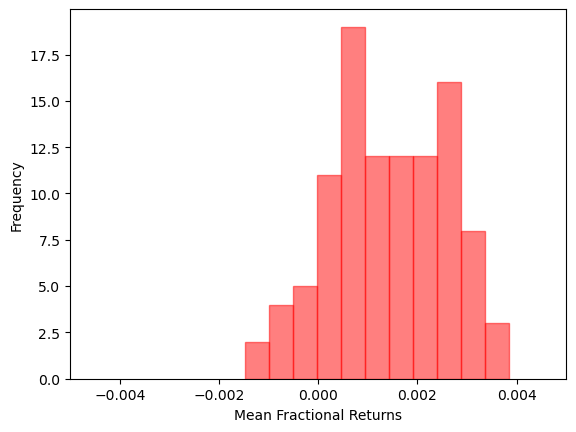

In [33]:
histogram_weekly4('d4_mean_freturns.csv')

In [34]:
# Function that outputs (frequency) histogram of weekly Day-4 and Day-5 returns of sequences
def histogram_weekly5(csv_path):
    data_path = os.path.join(os.getcwd(), csv_path)
    df1 = pd.read_csv(data_path, header = None)
    
    df1_max = float(df1.max())
    df1_min = float(df1.min())
    
    n1 = df1.count()
    
    df1_bins = (df1_max - df1_min)/math.sqrt(n1)
    
    df1_binwidth = df1_bins
    
    df1_xbins = np.arange(df1_min, df1_max + df1_binwidth, df1_binwidth)
    
    plt.xlim(-0.005,0.005)
    
    plt.xlabel('Mean Fractional Returns')
    plt.ylabel('Frequency')
    
    plt.hist(df1, bins=df1_xbins, density=False, alpha=0.5, color='b', edgecolor='blue')
    
    plt.savefig('G1 D5 Mean Freturns.jpg')
    
    data = {
    "Fractional Return": ["Day 4"],
    "Average Return": [float(df1.mean())],
    "Standard Deviation": [float(df1.std())]
    }

    df = pd.DataFrame(data)
    
    return df

,Fractional Return,Average Return,Standard Deviation
0,Day 4,0.00001,0.001354


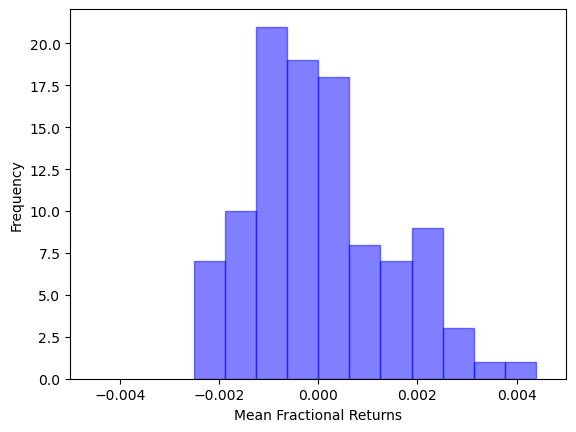

In [35]:
histogram_weekly5('d5_mean_freturns.csv')